In [2]:
import numpy as np 
import pandas as pd
import math 
import matplotlib.pyplot as plt
from scipy import optimize
from scipy.optimize import curve_fit
from scipy.integrate import odeint
from scipy import fftpack
from scipy import stats
from scipy.stats import norm


1\. **Hurricanes per Year**

The number of hurricanes in 2005 was 15. The historic average is 6.3. Is this number signficantly different?
- Assume the number of hurricanes is random, i.e. follows the Poisson distribution.
- Assume as statistically significant a probability that has a Z score of 3 or larger with respect a normal distribution.

**Hint**: compute the probability that in a single year are observed 15 or more hurricances.

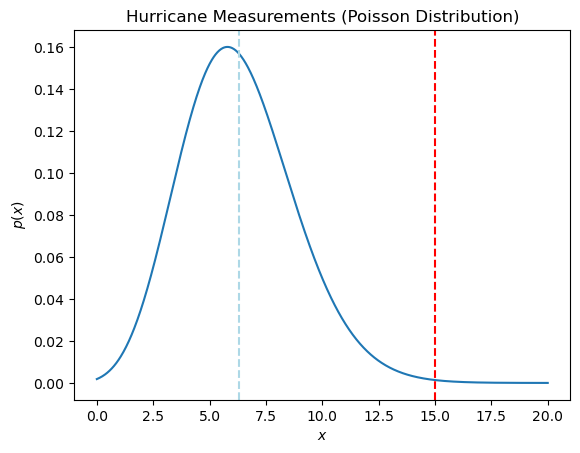

Z score =  1.380952380952381


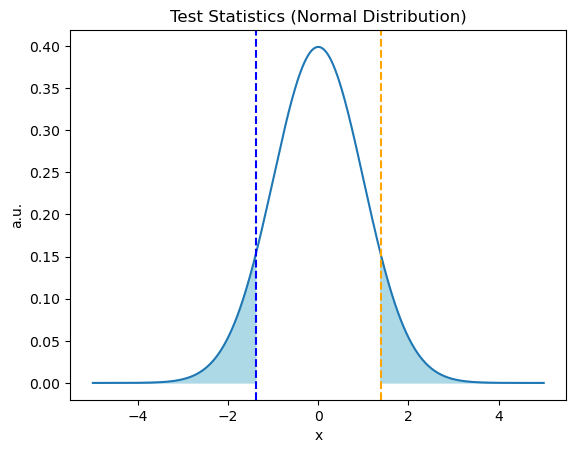

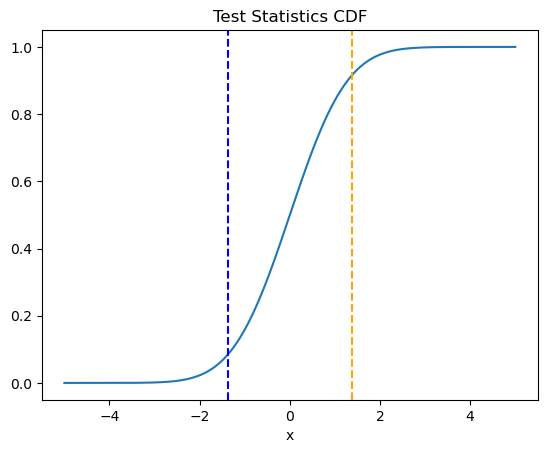

p-value:  0.1672936026551683 

We can accept the null hypothesis. The number of hurricanes in 2005 is not signficantly different from the distribution.



In [2]:
x0 = 15 #Number of Hurricanes in 2005
mu = 6.3 # Historic Average
alpha = 3. #Significance Level

#The Number of Hurricane is random and it follows a Poisson Distribution (assumption)
w = mu - x0
x = np.linspace(0, 20, 1000)
hurricanes = stats.poisson.pmf(x, mu)
varianza = stats.poisson.var(mu)
sigma_mu = varianza 

plt.plot(x,hurricanes)
plt.axvline(x0, linestyle = '--', color = 'red')
plt.axvline(mu, linestyle = '--', color = 'lightblue')
plt.title('Hurricane Measurements (Poisson Distribution)')
plt.ylabel("$p(x)$")
plt.xlabel("$x$")
plt.show()

#We are computing the Z score and p-value using the normal distribution (test statistics)
z = abs(x0 - mu) /sigma_mu #z-Score
print('Z score = ', z)
xs = np.linspace(-5, 5, 1000)
ts = stats.norm.pdf(xs)
plt.plot(xs, ts)
plt.fill_between(xs,ts,where=np.abs(xs) > np.abs(z), color = 'lightblue')
plt.axvline(z, linestyle = '--', color = 'orange')
plt.axvline(-z, linestyle = '--', color = 'blue')
plt.title('Test Statistics (Normal Distribution)')
plt.ylabel('a.u.')
plt.xlabel('x')
plt.show()

#Calculate the p-value through Gaussian Comulative Distribution Function
cs = stats.norm.cdf(xs)
plt.plot(xs,cs)
plt.axvline(z, linestyle = '--', color = 'orange')
plt.axvline(-z, linestyle = '--', color = 'blue')
plt.title('Test Statistics CDF')
plt.xlabel('x')
plt.show()

pvalue = stats.norm.cdf(-z) + (1. - stats.norm.cdf(z))
print('p-value: ', pvalue,'\n')

#Compare the p-value with the significance level
if pvalue < alpha:
    print('We can accept the null hypothesis. The number of hurricanes in 2005 is not signficantly different from the distribution.\n')
else:
    print('We cannot accept the null hypotesis. The number of hurricanes in 2005 is significantly different from the distribution.\n')

2\. **Pairwise t-test**

In an experiment, a group of 10 individuals agreed to participate in a study of blood pressure changes following exposure to halogen lighting. Resting systolic blood pressure was recorded for each individual. The participants were then exposed to 20 minutes in a room lit only by halogen lamps. A post-exposure systolic blood pressure reading was recorded for each individual. The results are presented in the following data set:

```python
pre = np.array([120, 132, 120, 110, 115, 128, 120, 112, 110, 100])
post = np.array([140, 156, 145, 130, 117, 148, 137, 119, 127, 135])
```

Determine whether the change in blood pressures within our sample was statistically significant.

**Hint:**
in this case, the Student's $t$-test should be performed to compare the two datasets.
Use the following test statistics:

$$T = \frac{\bar{x}_1 - \bar{x}_2}{\sigma \sqrt{\frac{2}{n}}}$$

and 

$$\sigma = \sqrt{\frac{\sigma_1^2 + \sigma_2^2}{2}}$$

t_test:  -3.6438559753116038


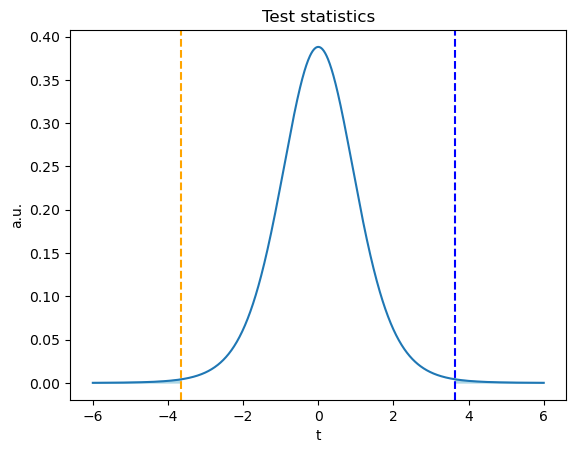

p-value = 0.0053685822360967465
Change in blood pressures within our sample was statistically significant


In [13]:
#def of arrays
pre = np.array([120, 132, 120, 110, 115, 128, 120, 112, 110, 100]) 
post = np.array([140, 156, 145, 130, 117, 148, 137, 119, 127, 135]) 
n = len(pre) #10

#mean 
mean_pre = np.mean(pre)
mean_post = np.mean(post)

#significant coefficient
alpha = 0.05

# sqrt() of variances
sigma_pre = np.sqrt(np.var(pre, ddof=1))
sigma_post = np.sqrt(np.var(post, ddof=2))


# test statistics
sigma = np.sqrt((sigma_pre**2 + sigma_post**2) / 2)
T = (mean_pre - mean_post) / (sigma*np.sqrt(2/n))
print('t_test: ', T)

#plot of test statistics and its pdf
xs = np.linspace(-6,+6,1000)
ts = stats.t.pdf(xs, n - 1)
plt.plot(xs,ts)
plt.fill_between(xs, ts, where=np.abs(xs) > np.abs(T), color='lightblue')
plt.axvline(T, linestyle='--', color='orange')
plt.axvline(-T, linestyle='--', color='blue')
plt.title("Test statistics")
plt.ylabel("a.u.")
plt.xlabel("t")
plt.show()

#now compute the p-value
pvalue = stats.t.cdf(T, n - 1) + (1. - stats.t.cdf(-T, n - 1))
print("p-value =", pvalue)
if pvalue < alpha:
    print('Change in blood pressures within our sample was statistically significant')
else:
     print('Change in blood pressures witing our sample was not statistically significant')   

3\. **Curve fitting of temperature in Alaska** 

The temperature extremes in Alaska for each month, starting in January, are given by (in degrees Celcius):

max:  `17,  19,  21,  28,  33,  38, 37,  37,  31,  23,  19,  18`

min: `-62, -59, -56, -46, -32, -18, -9, -13, -25, -46, -52, -58`

* Plot these temperatures.
* Find a suitable a function that can describe min and max temperatures. 
* Fit this function to the data with `scipy.optimize.curve_fit()`.
* Plot the result. Is the fit reasonable? If not, why?
* Is the time offset for min and max temperatures the same within the fit accuracy?

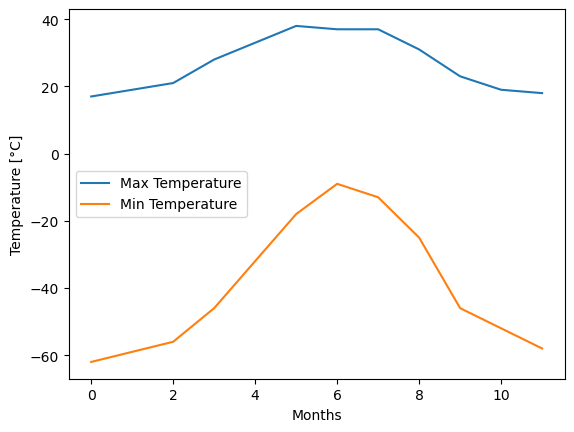

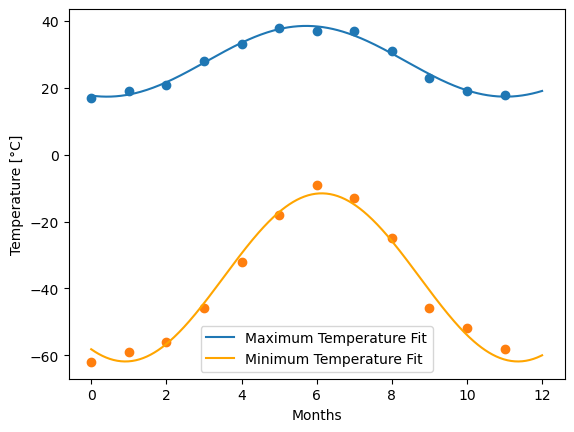

Time offset:  -0.4501200723563965


In [18]:
# Data arrays
max_temp = np.array([17, 19, 21, 28, 33, 38, 37, 37, 31, 23, 19, 18])
min_temp = np.array([-62, -59, -56, -46, -32, -18, -9, -13, -25, -46, -52, -58])
months = np.arange(12)

# Plot data
plt.figure()
plt.plot(months, max_temp, label="Max Temperature")
plt.plot(months, min_temp, label="Min Temperature")
plt.xlabel('Months')
plt.ylabel('Temperature [°C]')
plt.legend()

#Def of fit function 
def func(x, a, b, c, d):
    return a * np.sin(b * (x-c)) + d

# Fit the function to the data
p, p_cov = curve_fit(func, months, max_temp, p0 = [25, 1, 1, 5])
p2, p_cov2 = curve_fit(func, months, min_temp, p0 = [5, 1, 5, 5])

# Plot the fit
days = np.linspace(0,12, 365)
plt.figure()
plt.plot(months, max_temp, 'o')
plt.plot(days, func(days, *p), label='Maximum Temperature Fit', color = 'C0')
plt.plot(months, min_temp, 'o')
plt.plot(days, func(days, *p2), label='Minimum Temperature Fit', color = "orange")
plt.xlabel('Months')
plt.ylabel('Temperature [°C]')
plt.legend()
plt.show()

# The fit appears to be reasonable, as it follows the general trend of the data points.

# Is the time offset for min and max temperatures the same within the fit accuracy?

time_offset = params[2] - params2[2]
print("Time offset: ", time_offset)

# Yes, the offset between min and max temperatures is 0.50, which is within the fit accuracy

4\. **Fit the residues**

Read the `data/residuals_261.pkl` file. If you haven't got it already, download it from here:

```bash
wget https://www.dropbox.com/s/3uqleyc3wyz52tr/residuals_261.pkl -P data/
```

The feature named `residual` contains the residuals (defined as $y_i - \hat{y}_i$) of a linear regression as a function of the independent variable `distances`.

- Considering only the "residual" feature, create an histogram with the appropriate binning and plot it.
- Set the appropriate Poisson uncertainty for each bin (thus, for each bin, $\sigma_i = \sqrt{n_i}$, where $n_i$ is the number of entries in each bin)
- By looking at the distribution of the residuals, define an appropriate function and fit it to the histogram of the residuals
- Perform a goodness-of-fit test. Is the p-value of the fit satisfactory?

In [29]:
import pickle

df = pd.read_pickle("data/residuals_261.pkl")
df = pd.DataFrame(df.item())

df

,residuals,distances
0,1.100000,16.0
1,-1.950000,6.3
2,-7.200000,3.4
3,-4.150000,8.4
4,-6.590000,1.7
...,...,...
11126,-0.760000,14.4
11127,0.380000,7.5
11128,0.083333,1.7
11129,0.166667,19.1


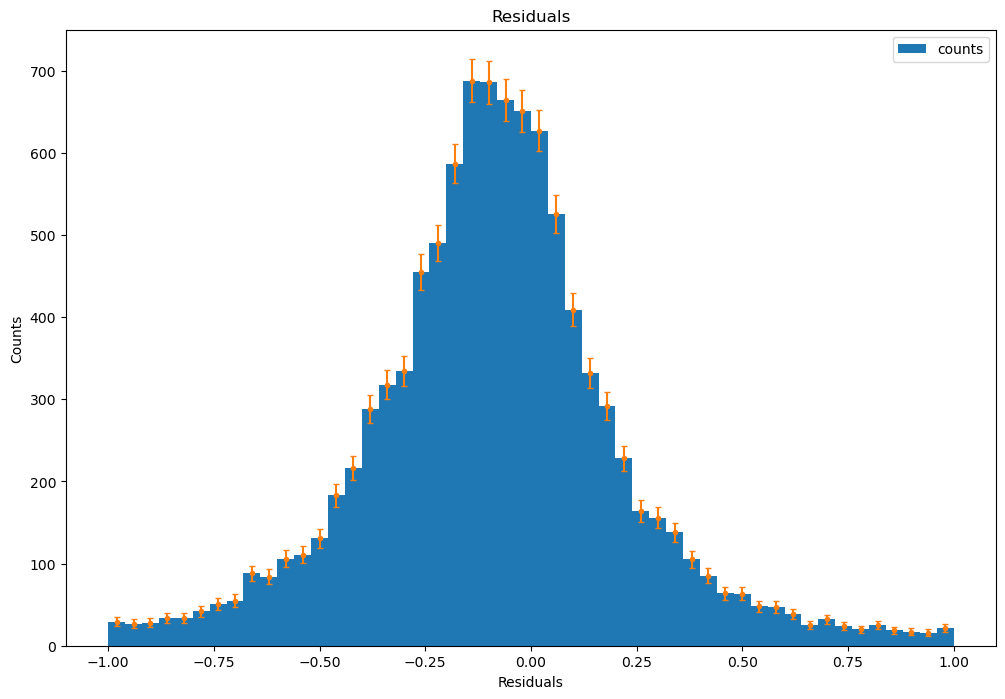

In [35]:
#plot of the histogram 
fig, ax = plt.subplots(figsize=(12, 8))
nbin = 50


bin_counts, bin_edges, _ = ax.hist(df['residuals'], range=(-1.0, 1.0), bins=nbin, label='counts')

bin_error = np.sqrt(bin_counts)  
bin_centres = (bin_edges[:-1] + bin_edges[1:]) / 2  

ax.errorbar(x=bin_centres, y=bin_counts, yerr=bin_error, fmt='.', capsize=2)
ax.set_title('Residuals')
ax.set_xlabel('Residuals')
ax.set_ylabel('Counts')
ax.legend(loc='best')

parameters:
 [ 3.65197603e+02 -8.69023176e-02  2.25217518e-01]
covariance matrix:
 [[ 6.10448318e+01 -1.73745577e-08  2.50976968e-02]
 [-1.73745577e-08  3.09555229e-05 -2.00823765e-11]
 [ 2.50976968e-02 -2.00823765e-11  3.09556001e-05]]


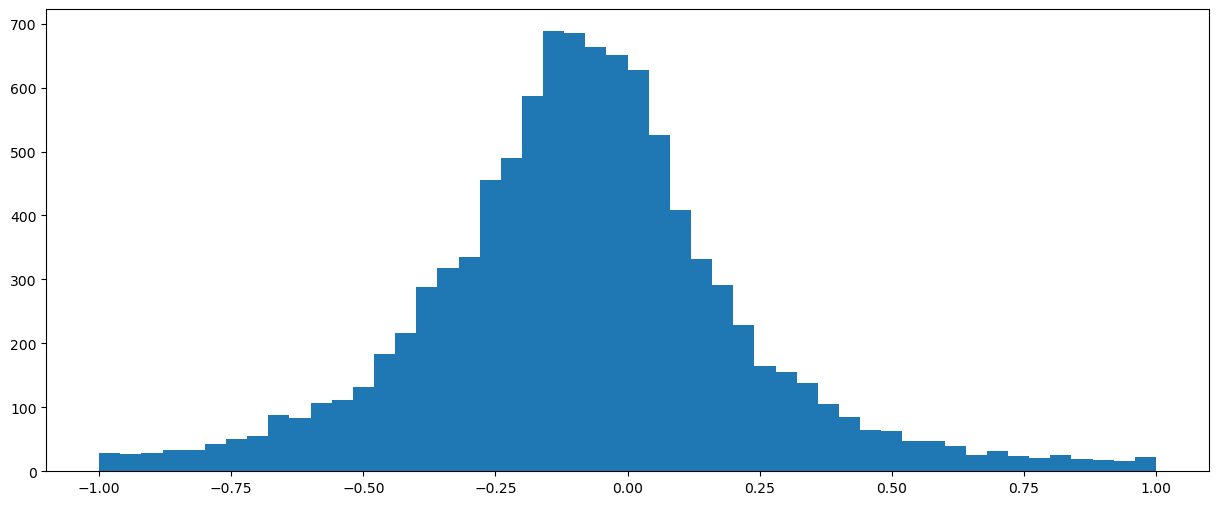

In [48]:
# normal distribution for fit
def normal(x, A, mu, sigma):
    return A*stats.norm.pdf(x, loc=mu, scale=sigma)

#parameters
popt_n, pcov_n = optimize.curve_fit(normal, bin_centres, bin_counts, p0=[500, 0, 0.2], full_output=False)
print("parameters:\n", popt_n)
print("covariance matrix:\n", pcov_n)

#plot

x = np.linspace(-1, 1, num=1000)

fig = plt.figure(figsize=(15, 6))

bin_counts, bin_edges, _ = plt.hist(df['residuals'], range=(-1.0, 1.0), bins=nbin, label='counts')

ax.errorbar(x=bin_centres, y=bin_counts, yerr=bin_error, fmt='.', capsize=2)
ax.set_title('Gaussian fit')
ax.set_xlabel('Residuals')
ax.set_ylabel('Counts')

ax.plot(x, normal(x, popt_n[0], popt_n[1], popt_n[2]), color='red', label='fitted function')
ax.legend(loc='best')



490.28554401175796
For the normal distribution: p-value = 0.0 and chi2= 490.28554401175796


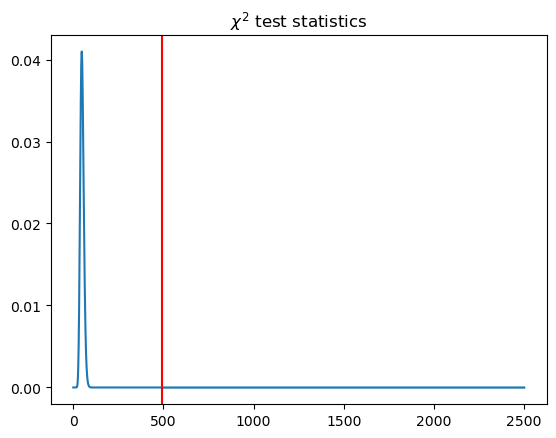

In [42]:
## goddess of fit

chi2= np.sum( ((bin_counts - normal(bin_centres, popt_n[0], popt_n[1], popt_n[2]))**2) / bin_error**2)

print(chi2)

p = np.linspace(0,2500, num=3000)
ts = stats.chi2.pdf(p, df=nbin-1)
plt.plot(p, ts)
plt.title("$\chi^2$ test statistics")
plt.axvline(chi2, color='red')

plt.fill_between(p, ts, where=(p > chi2), color='lightblue')

# calculate the p-value from the chi^2, the n.d.o.f., and the cumulative chi^2 distribution
pvalue_n = 1. - stats.chi2.cdf(chi2, nbin)

print("For the normal distribution: p-value =", pvalue_n, 'and chi2=', chi2) 

5\. **Temperatures in Munich**

Get the following data file:

```bash
https://www.dropbox.com/s/7gy9yjl00ymxb8h/munich_temperatures_average_with_bad_data.txt
```

which gives the temperature in Munich every day for several years.


Fit the following function to the data:

$$f(t) = a \cos(2\pi t + b)+c$$

where $t$ is the time in years.

- Make a plot of the data and the best-fit model in the range 2008 to 2012.

   - What are the best-fit values of the parameters?

   - What is the overall average temperature in Munich, and what are the typical daily average values predicted by the model for the coldest and hottest time of year?

   - What is the meaning of the $b$ parameter, and what physical sense does it have?


- Now fit the data with the function $g(x)$, which has 1 more parameter than $f(x)$.
$$g(x) = a \cos(2\pi b t + c)+d$$
   - What are the RSS for $f(x)$ and $g(x)$?
   - Use the Fisher F-test to determine whether the additional parameter is motivated.

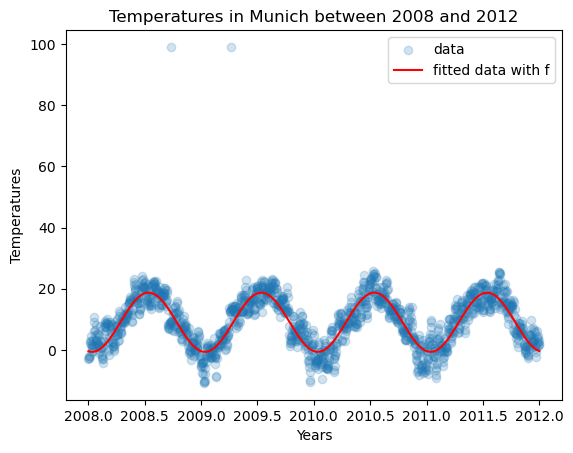

Best-fit parameters:
a =  -9.671276803543966 
b =  -0.2236532705532413 
c =  9.052562084954289 

Overall average temperature in Munich:  9.38409773497604
Daily average values predicted for the hottest time of the year:  18.723638526194584
Daily averae values predicted for the coldest time of the year:  -0.6187147127652963 



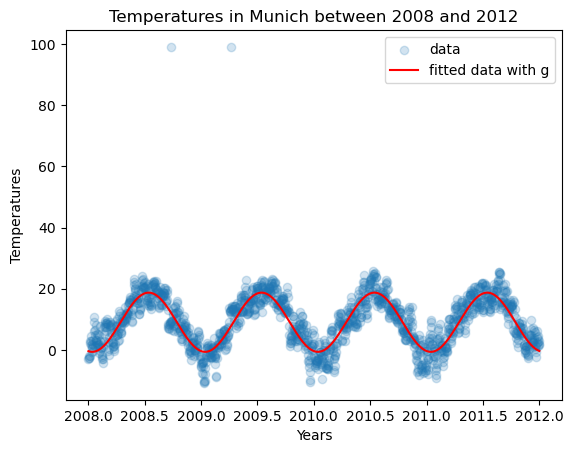

Best-fit parameters:
a =  -9.671550826668295 
b =  0.9997394819454894 
c =  15.623483142689885 
d =  9.0513517309701 

SSR of f:  234640.33598879387
SSR of g:  232884.85466590963 

Fisher F-score:  10.990374502614175
P-value: 0.001  additional parameter necessary:  YES




In [28]:
# data

#!wget https://www.dropbox.com/s/7gy9yjl00ymxb8h/munich_temperatures_average_with_bad_data.txt -P data/
fname = 'data/munich_temperatures_average_with_bad_data.txt'


date, temperature = np.loadtxt(fname, unpack=True)
columns = ['Temperature']

data = pd.DataFrame({'Date': pd.Series(date),'Temperature' : pd.Series(temperature)})

# defining the fit function and finding the fitting parameters
def f(time,a,b,c):
    return a*np.cos(2*np.pi*time + b) +c

param, pcov = optimize.curve_fit(f, date, temperature, p0 = [0,0,0])

## Make a plot of the data and the best-fit model in the range 2008 to 2012

data = data[data['Date'] >= 2008]
data = data[data['Date'] < 2012]

#time = np.linspace(2008,2012, len(data)) #not necessary
plt.figure()
plt.scatter(data['Date'], data['Temperature'], alpha = 0.2, label = 'data')
plt.plot(data['Date'], param[0]*np.cos(2*np.pi*data['Date'] + param[1]) + param[2], color ='red', label = 'fitted data with f')
plt.xlabel('Years')
plt.ylabel('Temperatures')
plt.title('Temperatures in Munich between 2008 and 2012')
plt.legend(loc = 'best')
plt.show()

#What are the best-fit values of the parameters?
print('Best-fit parameters:\na = ', param[0],'\nb = ', param[1],'\nc = ', param[2],'\n')

#What is the overall average temperature in Munich, and what are the typical daily 
#average values predicted by the model for the coldest and hottest time of year?
average_temperature = np.mean(data['Temperature'])
print('Overall average temperature in Munich: ', average_temperature)
daily_average_hot = max(f(data['Date'], param[0], param[1], param[2]))
daily_average_cold = min(f(data['Date'], param[0], param[1], param[2]))
print('Daily average values predicted for the hottest time of the year: ', daily_average_hot)
print('Daily averae values predicted for the coldest time of the year: ', daily_average_cold, '\n')


## Fitting the data with a function g(x) with one more parameter than f(x)
def g(time, a,b,c,d):
    return a*np.cos(2*np.pi*time*b + c) + d

paramg, gcov = optimize.curve_fit(g, date, temperature)

plt.figure()
plt.scatter(data['Date'], data['Temperature'], alpha = 0.2, label = 'data')
plt.plot(data['Date'], paramg[0]*np.cos(2*np.pi*data['Date']*paramg[1] + paramg[2]) + paramg[3], color ='red', label = 'fitted data with g')
plt.xlabel('Years')
plt.ylabel('Temperatures')
plt.title('Temperatures in Munich between 2008 and 2012')
plt.legend(loc = 'best')
plt.show()

print('Best-fit parameters:\na = ', paramg[0],'\nb = ', paramg[1],'\nc = ', paramg[2],'\nd = ', paramg[3],'\n')

## Computing the RSS for both the fitting with f and g
SSRf = (sum(data['Temperature'] - f(data['Date'], param[0], param[1], param[2]))**2)
SSRg = (sum(data['Temperature'] - g(data['Date'], paramg[0], paramg[1], paramg[2], paramg[3]))**2)
n1 = len(param) - 1
n2 = len(paramg) - 1
print('SSR of f: ', SSRf)
print('SSR of g: ', SSRg, '\n')

##Using the Fisher F-test to see if the use of an additional parameter is motivated
alpha = 0.05

def Ftest(SSR1, SSR2, n1, n2, nbins, verbose = False):
    F = (((SSR1 - SSR2)/(n2 - n1))/(SSR2/(nbins - n2)))
    pval = 1. - stats.f.cdf(F, n2 - n1, nbins - n2)
    if verbose:
        print('Fisher F-score: ', F)
        print('P-value: %.3f' %pval, ' additional parameter necessary: ', 'YES' if pval < alpha else 'NO')
    return F, pval

F, pval = Ftest(SSRf, SSRg, n1, n2, len(data), verbose = True)
print('\n')